# Deskripsi library yang digunakan 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memanggil Dataset

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Deskripsi Dataset

In [3]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


# Menghilangkan dataset yang tidka saya inginkan

In [4]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

# Mengganti dataset huruf menjadi angka

In [5]:
name_of_col = ['store_and_fwd_flag']
for i in range(len(name_of_col)) :
    df[name_of_col[i]]= df[name_of_col[i]].map({'N':0,'Y':1}).astype(int)

# Deskripsi dataset baru

In [6]:
df.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,6,3.34,1,0,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,1,1.80,1,0,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,1,1.00,1,0,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,1,3.70,1,0,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,1,4.37,1,0,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   passenger_count        22699 non-null  int64  
 3   trip_distance          22699 non-null  float64
 4   RatecodeID             22699 non-null  int64  
 5   store_and_fwd_flag     22699 non-null  int32  
 6   PULocationID           22699 non-null  int64  
 7   DOLocationID           22699 non-null  int64  
 8   payment_type           22699 non-null  int64  
 9   fare_amount            22699 non-null  float64
 10  extra                  22699 non-null  float64
 11  mta_tax                22699 non-null  float64
 12  tip_amount             22699 non-null  float64
 13  tolls_amount           22699 non-null  float64
 14  improvement_surcharge  22699 non-null  float64
 15  to

<Axes: >

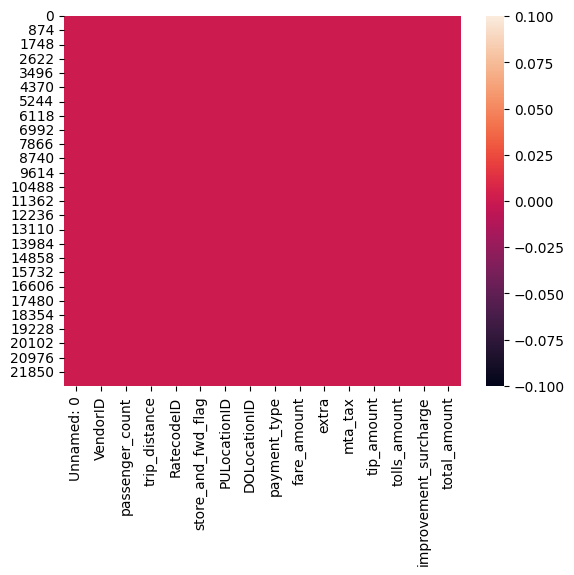

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,0.004361,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,0.065898,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,0.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,0.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,0.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,1.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


# Visualisasi data

<Axes: >

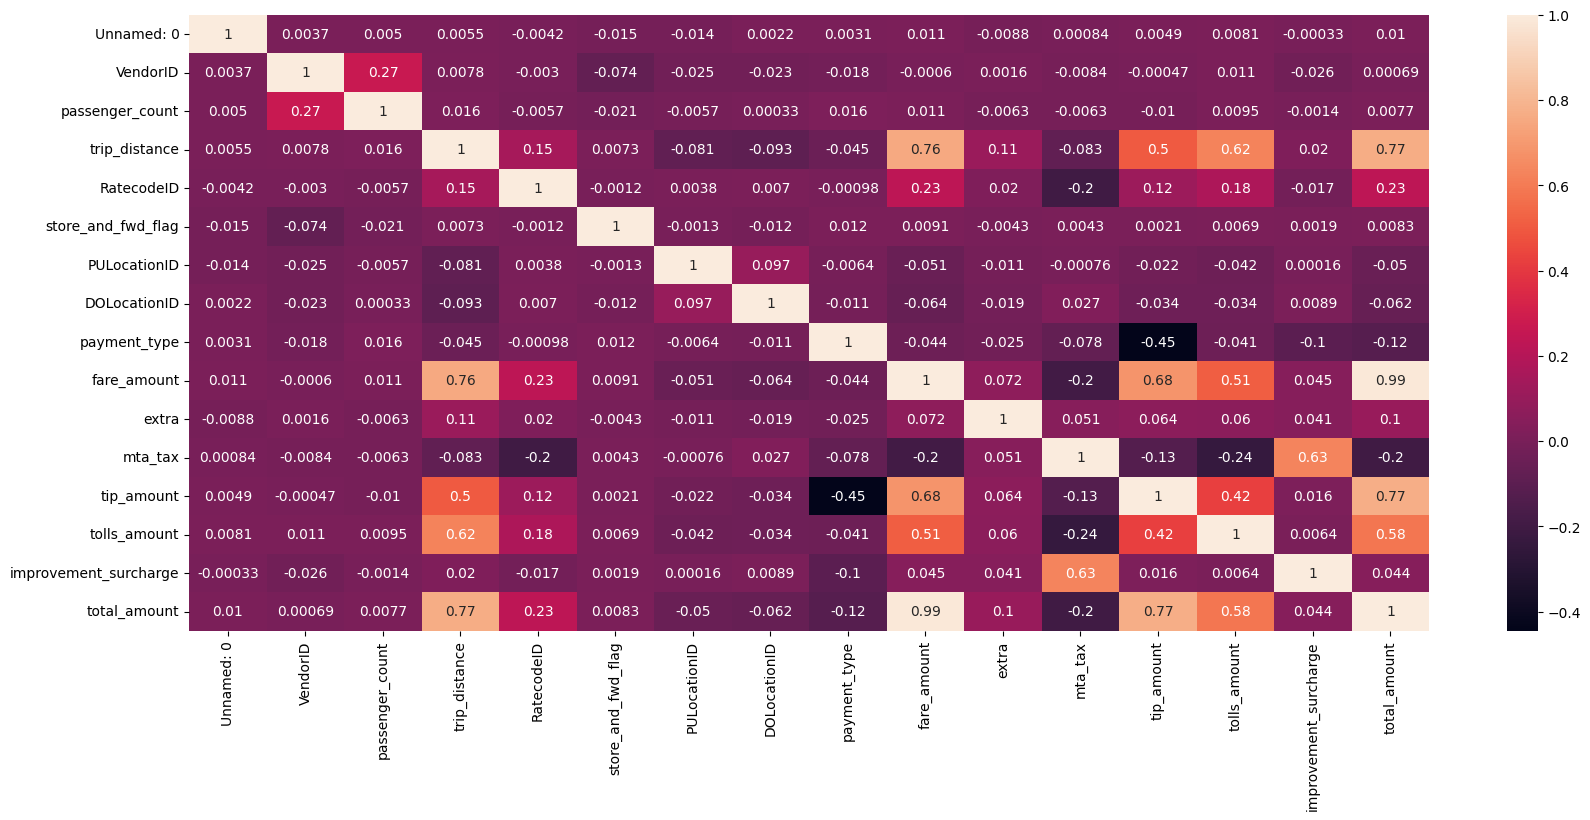

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah trip_distance (Jarak perjalanan)

In [12]:
trip_distanc = df.groupby('trip_distance').count()[['mta_tax']].sort_values(by='mta_tax',ascending=True).reset_index()
trip_distanc = trip_distanc.rename(columns={'mta_tax':'fare_amount'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

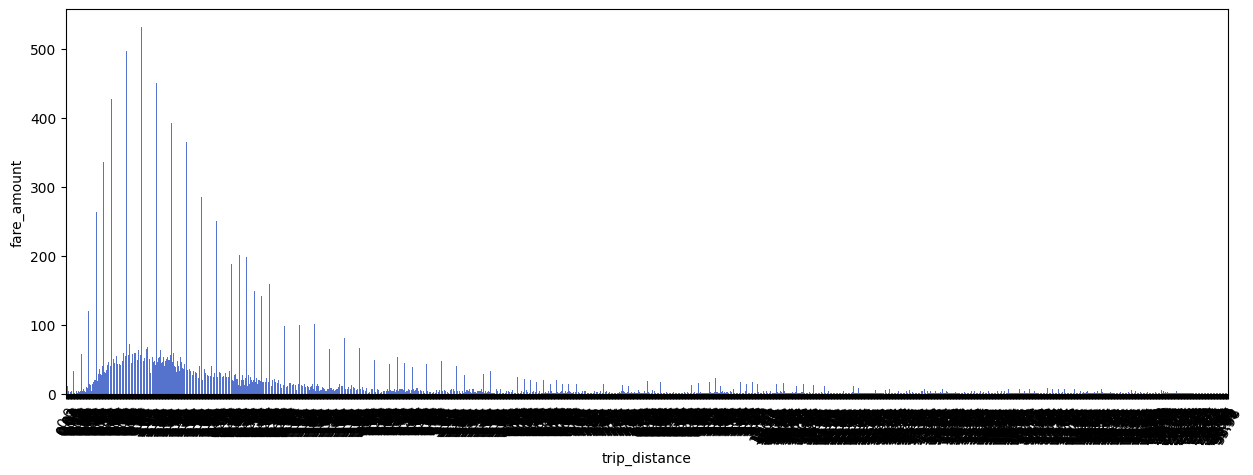

In [20]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=tmodel['trip_distance'], y=model['fare_amount'],color='royalblue')
plt.xticks(rotation=60)

# Jumlah tip_amount (Jumlah tip)

In [13]:
tip_amount = df.groupby('tip_amount').count()[['mta_tax']].sort_values(by='mta_tax').reset_index()
tip_amount = tip_amount.rename(columns={'mta_tax':'count'})

<Axes: xlabel='tip_amount', ylabel='count'>

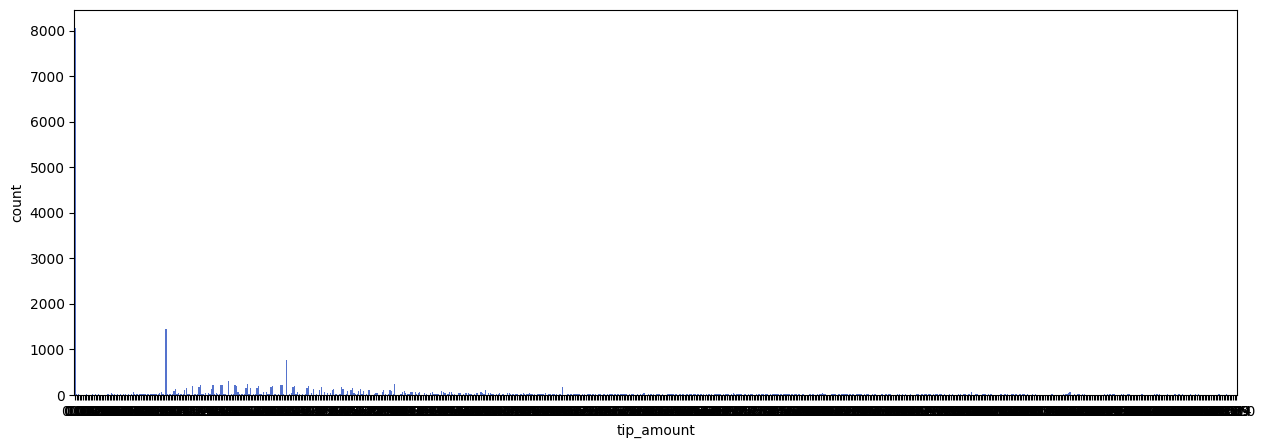

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=tip_amount['tip_amount'], y=tip_amount['count'], color='royalblue')

# PULocationID (Zona taximeter digunakan)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8380\2880387876.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PULocationID'])


<Axes: xlabel='PULocationID', ylabel='Density'>

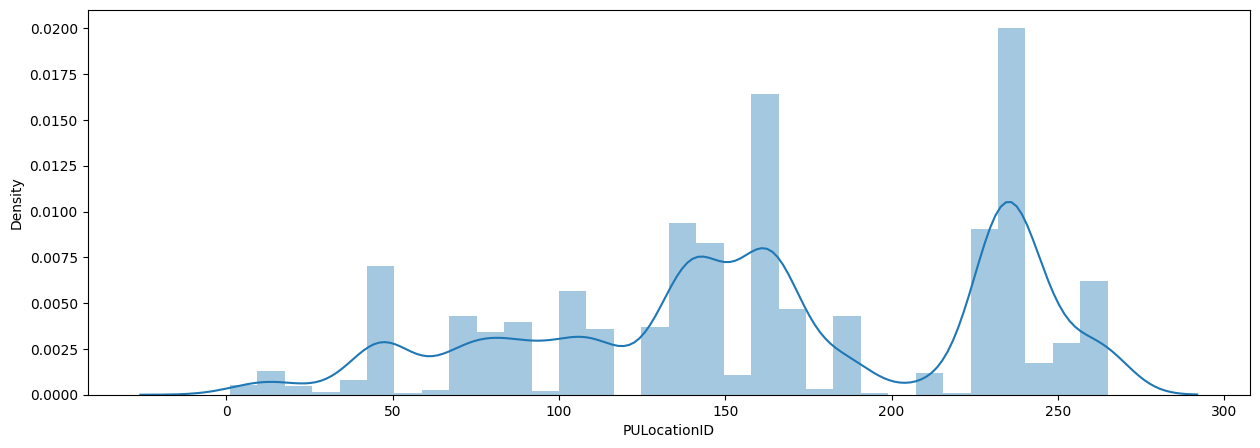

In [23]:
plt.figure(figsize=(15,5))
sns.distplot(df['PULocationID'])

# DOLocationID (Zona taxi meter dilepas)

C:\Users\Asus\AppData\Local\Temp\ipykernel_8380\2532493210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DOLocationID'])


<Axes: xlabel='DOLocationID', ylabel='Density'>

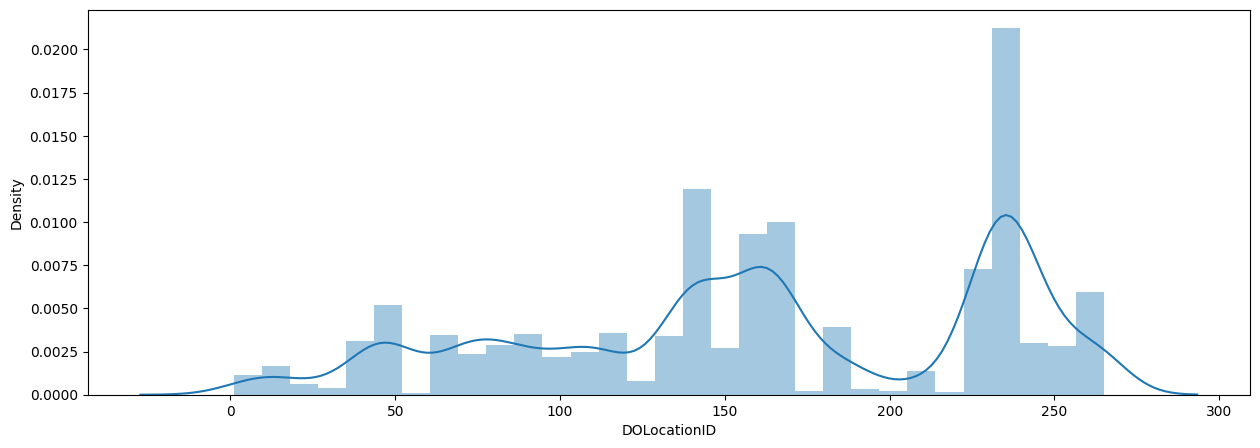

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df['DOLocationID'])

# Seleksi Fitur

In [3]:
features = ['passenger_count',	'trip_distance', 'PULocationID',	'DOLocationID',	'payment_type',	'fare_amount', 'mta_tax',	'tip_amount']
x = df[features]
y = df['total_amount']
x.shape, y.shape

((22699, 8), (22699,))

# Split data training dan data testing

In [4]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=25)
y_test.shape

(5675,)

# Membuat metode regresi linear

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [8]:
score = lr.score(X_test, y_test)
print('Akurasi Yellow Taxi = ', score)

Akurasi Yellow Taxi =  0.9943508589679306


In [42]:
from sklearn.metrics import accuracy_score

In [44]:
x_train.prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train.prediction)
print(training_data_accuracy)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6780\1430927725.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_train.prediction = lr.predict(x_train)


ValueError: continuous is not supported

In [40]:
from sklearn.metrics import precision_recall_curve, f1_score

threshold = 200000

y_pred = lr.predict(X_test)

y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary)
print('Skor f1:', f1)

Skor f1: 0.0


C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [41]:
from sklearn.metrics import precision_recall_curve, accuracy_score

threshold = 2000

y_pred = lr.predict(X_test)

y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)

print('skor akurasi:', accuracy)


skor akurasi: 1.0


In [31]:
from sklearn.metrics import accuracy_score

# Definisikan prediksi model (y_pred) dan label sebenarnya (y_true)
y_pred = [0, 1, 1, 0, 1, 1, 0, 0]  # Contoh prediksi
y_true = [6, 3.34, 100, 231, 1,	13, 0.5, 2.75]  # Contoh label sebenarnya

# Hitung akurasi
accuracy = accuracy_score(y_true, y_pred)

# Tampilkan hasil akurasi
print("Akurasi:", accuracy)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

# Membuat inputan model regresi linear

In [44]:
input_data = np.array([[6,	3.34, 100, 231,	1,	13, 0.5,  2.75]])

prediction = lr.predict(input_data)
print('Estimasi Trip Yellow Taxi :', prediction)

Estimasi Trip Yellow Taxi : [17.32959222]


C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [32]:
import pickle

filename = 'Taxi_Yellow.sav'
pickle.dump(lr,open(filename,'wb'))